# DBSCAN Clustering Attempt
# --------------------------------------
# Description:
# This notebook explores the use of DBSCAN for clustering movement patterns
# based on the anonymized exercise dataset. While DBSCAN was tested, the results
# were not especially useful for the final application. This notebook remains here
# for transparency and documentation of the modeling process.
#
# Author: Darren McCauley
# Date: April 2025

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
#Now you can access the file using its name, e.g. 'ImprovedData.xlsx'
#If the uploaded filename is different from ImprovedData.xlsx, replace accordingly
import pandas as pd
df = pd.read_excel('ImprovedData.xlsx')
print(df.head())


Saving ImprovedData.xlsx to ImprovedData.xlsx
User uploaded file "ImprovedData.xlsx" with length 93072 bytes
    UserID      Name Location  Total_Distance  Very_Active_Distance  \
0  7423388  Danielle      QLD            8.02                  2.03   
1  7550634     Angel      NSW            5.82                  2.28   
2  5304572    Joshua      NSW            0.11                  0.00   
3  3234489   Jeffrey      NSW            7.21                  0.00   
4  8204212      Jill      QLD            7.86                  0.34   

   Moderately_Active_Distance  Light_Active_Distance  \
0                        0.48                   5.52   
1                        0.90                   2.64   
2                        0.00                   0.11   
3                        0.34                   6.87   
4                        0.73                   6.79   

   Sedentary_Active_Distance  Very_Active_Minutes  Fairly_Active_Minutes  \
0                        0.0                   26  

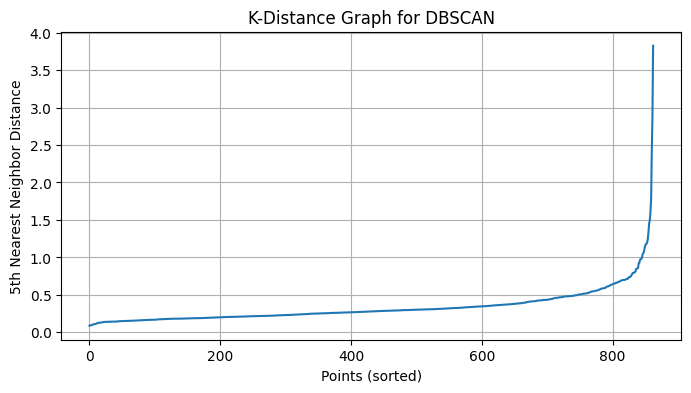

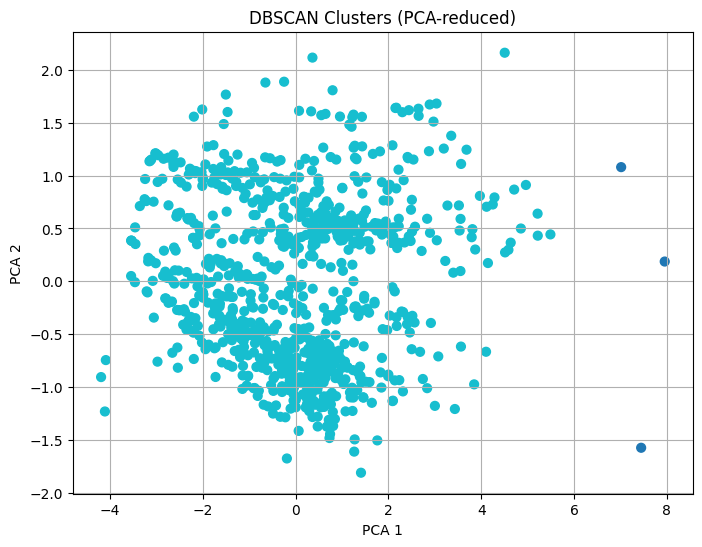

Cluster label counts:
dbscan_cluster
 0    860
-1      3
Name: count, dtype: int64


,UserID,Name,Steps,Calories_Burned,Minutes,dbscan_cluster
0,7423388,Danielle,10449,2536,385,0
1,7550634,Angel,8001,2902,181,0
2,5304572,Joshua,152,2100,12,0
3,3234489,Jeffrey,9543,2450,359,0
4,8204212,Jill,10218,3013,283,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

df1 = df.copy()
df1['Minutes'] = (
    df1['Very_Active_Minutes'] +
    df1['Fairly_Active_Minutes'] +
    df1['Lightly_Active_Minutes']
)

numerical_features = ['Total_Distance', 'Minutes', 'Steps', 'Calories_Burned']
X = df1[numerical_features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)
distances = np.sort(distances[:, 4])

plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title('K-Distance Graph for DBSCAN')
plt.xlabel('Points (sorted)')
plt.ylabel('5th Nearest Neighbor Distance')
plt.grid(True)
plt.show()

dbscan = DBSCAN(eps=1.5, min_samples=5)
df1['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df1['dbscan_cluster'], cmap='tab10', s=40)
plt.title('DBSCAN Clusters (PCA-reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

print("Cluster label counts:")
print(df1['dbscan_cluster'].value_counts())

df1[['UserID', 'Name', 'Steps', 'Calories_Burned', 'Minutes', 'dbscan_cluster']].head()


In [ ]:
for eps in [0.3, 0.5, 0.7, 1.0, 1.3, 1.5]:
    db = DBSCAN(eps=eps, min_samples=5).fit(X_scaled)
    labels = db.labels_
    print(f"eps={eps:.1f} → clusters: {len(set(labels)) - (1 if -1 in labels else 0)} | noise: {list(labels).count(-1)}")


eps=0.3 → clusters: 16 | noise: 244
eps=0.5 → clusters: 4 | noise: 72
eps=0.7 → clusters: 2 | noise: 24
eps=1.0 → clusters: 1 | noise: 11
eps=1.3 → clusters: 1 | noise: 4
eps=1.5 → clusters: 1 | noise: 3


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd

df1 = df.copy()

df1['Minutes'] = df1['Very_Active_Minutes'] + df1['Fairly_Active_Minutes'] + df1['Lightly_Active_Minutes']

numerical_features = ['Total_Distance', 'Minutes', 'Steps', 'Calories_Burned']
X = df1[numerical_features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=.3, min_samples=5)
df1['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

print("Cluster counts:\n", df1['dbscan_cluster'].value_counts())

cluster_medians = df1.groupby('dbscan_cluster')[numerical_features].median()

print("\nMedian values per cluster:")
print(cluster_medians)


Cluster counts:
 dbscan_cluster
 1     343
-1     244
 0     183
 3      15
 2       9
 11      8
 7       7
 10      7
 5       6
 9       6
 6       6
 13      6
 8       6
 4       5
 15      5
 12      4
 14      3
Name: count, dtype: int64

Median values per cluster:
                Total_Distance  Minutes    Steps  Calories_Burned
dbscan_cluster                                                   
-1                       7.715    292.0  10681.0           2701.0
 0                       4.620    216.0   6132.0           2743.0
 1                       4.710    261.0   6987.0           1906.0
 2                       9.510    324.0  14673.0           1990.0
 3                       1.390    112.0   2064.0           1974.0
 4                       5.960    233.0   9010.0           1495.0
 5                       3.750    259.0   6052.5           1584.5
 6                      12.440    268.5  15706.5           3082.5
 7                       9.790    340.0  12857.0           3290.0
 